In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('time_series_covid_19_confirmed.csv')
#df = pd.read_csv(r'E:\convid\time_series_covid_19_recovered.csv')

In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


In [4]:
df.drop(['Province/State','Country/Region','Lat','Long'],axis=1,inplace=True)

In [25]:
df.head()

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020
0,2,3,5,7,8,8,14,14,14,19,...,47,48,50,50,50,53,59,70,75,82
1,2,1,2,2,4,4,7,7,11,15,...,360,420,461,502,511,581,639,639,701,773
2,0,1,3,3,4,5,7,7,10,13,...,117,130,138,150,150,160,178,178,200,212
3,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,3,4,4,4,7,8,8,...,50,83,93,99,117,129,149,149,197,238


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 53 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   1/22/2020  442 non-null    int64
 1   1/23/2020  442 non-null    int64
 2   1/24/2020  442 non-null    int64
 3   1/25/2020  442 non-null    int64
 4   1/26/2020  442 non-null    int64
 5   1/27/2020  442 non-null    int64
 6   1/28/2020  442 non-null    int64
 7   1/29/2020  442 non-null    int64
 8   1/30/2020  442 non-null    int64
 9   1/31/2020  442 non-null    int64
 10  2/1/2020   442 non-null    int64
 11  2/2/2020   442 non-null    int64
 12  2/3/2020   442 non-null    int64
 13  2/4/2020   442 non-null    int64
 14  2/5/2020   442 non-null    int64
 15  2/6/2020   442 non-null    int64
 16  2/7/2020   442 non-null    int64
 17  2/8/2020   442 non-null    int64
 18  2/9/2020   442 non-null    int64
 19  2/10/2020  442 non-null    int64
 20  2/11/2020  442 non-null    int64
 21  2/12/2020  442 n

In [6]:
dataset = df.copy()
X = np.asarray(dataset.drop('3/14/2020', axis=1))
y = np.asarray(dataset['3/14/2020'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
numDims = X.shape[1]
dnnModel = tf.keras.Sequential([    
    layers.Dense(16, activation='relu', input_shape=(numDims,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(126, activation='relu'),
    layers.Dense(160, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1)
])
# optimizer = tf.keras.optimizers.RMSprop(0.0001)
optimizer = tf.keras.optimizers.Adam(0.0001)

#  mae = 'mean absolute eror',   mse = 'mean square error'                               
dnnModel.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])

In [9]:
dnnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                848       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 126)               2142      
                                                                 
 dense_3 (Dense)             (None, 160)               20320     
                                                                 
 dense_4 (Dense)             (None, 10)                1610      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 25203 (98.45 KB)
Trainable params: 25203 (

In [10]:
EPOCHS =500

history = dnnModel.fit(X, y,epochs=EPOCHS, validation_split = 0.2)

Epoch 1/500


12/12 [==============================] - 2s 23ms/step - loss: 14542971.0000 - mae: 431.7054 - mse: 14542971.0000 - val_loss: 14350.0166 - val_mae: 13.5268 - val_mse: 14350.0166
Epoch 2/500
12/12 [==============================] - 0s 6ms/step - loss: 13479069.0000 - mae: 421.3897 - mse: 13479069.0000 - val_loss: 14246.5732 - val_mae: 13.4796 - val_mse: 14246.5732
Epoch 3/500
12/12 [==============================] - 0s 6ms/step - loss: 12520787.0000 - mae: 411.8506 - mse: 12520787.0000 - val_loss: 14159.9111 - val_mae: 13.4404 - val_mse: 14159.9111
Epoch 4/500
12/12 [==============================] - 0s 6ms/step - loss: 11702345.0000 - mae: 403.1549 - mse: 11702345.0000 - val_loss: 14061.9873 - val_mae: 13.3960 - val_mse: 14061.9873
Epoch 5/500
12/12 [==============================] - 0s 5ms/step - loss: 10978359.0000 - mae: 394.7354 - mse: 10978359.0000 - val_loss: 13953.7734 - val_mae: 13.3469 - val_mse: 13953.7734
Epoch 6/500
12/12 [==============================] - 0s 5

In [11]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(10)

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
490,4125.627930,10.224867,4125.627930,371.936523,2.691885,371.936523,490
491,7471.485840,11.888797,7471.485840,351.445831,2.637575,351.445831,491
492,11820.136719,13.020966,11820.136719,349.125092,2.630794,349.125092,492
493,2512.645508,10.404675,2512.645508,383.836761,2.718615,383.836761,493
494,86963.437500,25.373705,86963.437500,270.715057,2.406781,270.715057,494
495,83830.765625,25.322868,83830.765625,414.986267,2.796754,414.986267,495
496,73370.921875,26.205286,73370.921875,377.663849,2.701065,377.663849,496
497,23799.816406,17.957846,23799.816406,332.979462,2.585310,332.979462,497
498,403.422058,7.554935,403.422058,397.666840,2.756855,397.666840,498
499,1435.693481,9.907497,1435.693481,230.534912,2.281006,230.534912,499


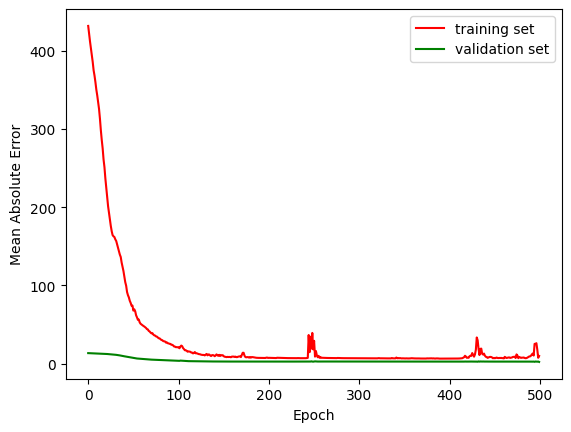

In [12]:
plt.plot(hist['mae'],color='red')
plt.plot(hist['val_mae'],color='green')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(['training set','validation set'])

plt.show() 


- Score and prediction test

- - Mean score model

In [13]:
test_loss, MAE_Score, MSE_Score = dnnModel.evaluate(X_test,  y_test, verbose=2)
print('\Mean absolute error Score:', MAE_Score)
print('\Mean Square error Score:', MSE_Score)

3/3 - 0s - loss: 3780.3948 - mae: 15.9824 - mse: 3780.3948 - 42ms/epoch - 14ms/step
\Mean absolute error Score: 15.982377052307129
\Mean Square error Score: 3780.394775390625


In [14]:
X_test.shape

(89, 52)

In [15]:
y_test.shape

(89,)

- - Prediction and score model

In [16]:
from sklearn.metrics import r2_score

# X_test and y_test are your test data
y_pred = dnnModel.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print('R-squared Score:', r2)

3/3 [==============================] - 0s 3ms/step
R-squared Score: 0.9985982802152421


In [17]:
y_pred_reshape = y_pred.squeeze(axis=1)

In [18]:
y_pred_reshape.shape

(89,)

In [19]:
idx = np.random.randint(1,len(y_test))
print(f'Index = {idx}  Predicted:{y_pred[idx]}  Actual:{y_test[idx]}')

Index = 37  Predicted:[-0.03588065]  Actual:0


In [20]:
y_test.shape

(89,)

In [21]:
y_pred.shape

(89, 1)

In [22]:
test = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred_reshape})

In [23]:
test

,y_test,y_pred
0,0,-0.035881
1,0,-0.035881
2,0,0.001707
3,1,-0.035881
4,0,-0.035881
...,...,...
84,0,-0.035881
85,0,-0.035881
86,10,14.991141
87,2,5.729064


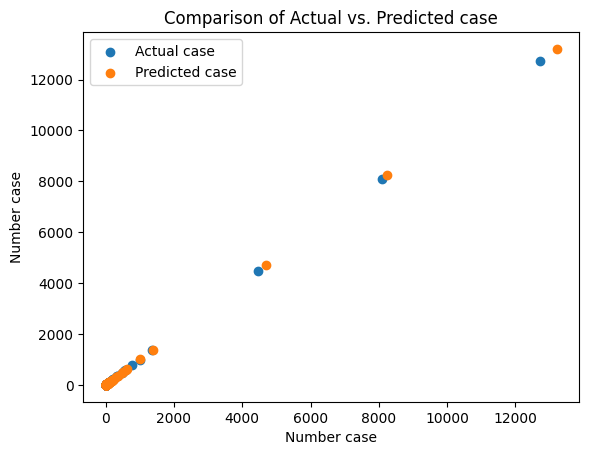

In [46]:
plt.scatter(test['y_test'], test['y_test'], label='Actual case')
plt.scatter(test['y_pred'], test['y_pred'], label='Predicted case')
plt.xlabel('Number case')
plt.ylabel('Number case')
plt.title('Comparison of Actual vs. Predicted case')
plt.legend()
plt.show()